In [33]:
import sys
sys.path.insert(0, "..")
from classes.calculators.lennardjones import LennardJones
from classes.atoms import Atom_Collection, Atom
from classes.optimizers.metropol import Metropol
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
plt.rc('animation', html='jshtml')

In [34]:
def random_inits(N, x_min=-4.0, x_max=4.0, y_min=-4.0, y_max=4.0):
    ns = np.random.rand(N,2)
    ns[:,0]*=(x_max-x_min)
    ns[:,0]+=x_min
    ns[:,1]*=(y_max-y_min)
    ns[:,1]+=y_min
    return ns

def create_atom_col(N_atoms, grid_size, fixed_col="C1", non_fixed_col="C0"):
    atom_list = []
    colors = [fixed_col] + [non_fixed_col for i in range(N_atoms-1)]
    init_pos = random_inits(N=N_atoms-1, x_min=grid_size[0], x_max=grid_size[1], y_min=grid_size[0], y_max=grid_size[1])
    init_pos_fixed = np.array([0.0,0.0])
    new_arr = np.insert(init_pos,0, init_pos_fixed).reshape(N_atoms, 2)
    for pos, col in zip(new_arr, colors):
        atom = Atom(pos, color=col)
        atom_list.append(atom)
    atom_col = Atom_Collection(atomlist=atom_list)
    atom_col.freeze_atoms(indices=[0])
    return atom_col

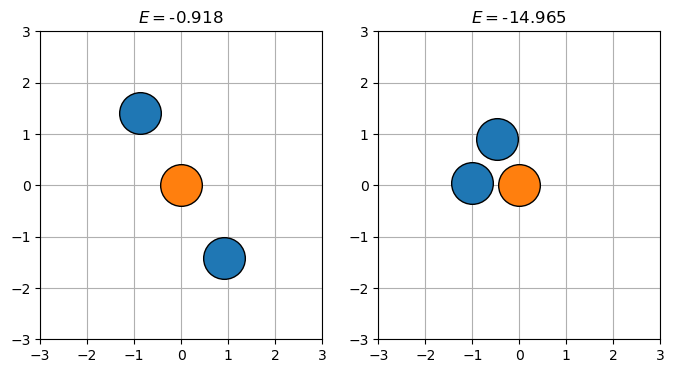

In [44]:
grid_size = [-3, 3]
fig, axs = plt.subplots(1,2,figsize=(8,4))
atom_col = create_atom_col(3, grid_size=grid_size)
atom_col.calculator = LennardJones()
optimizer = Metropol(atom_col=atom_col, T=0.05, step_size=0.1)

optimized_col = optimizer.run(N_max=2100, E_limit=-40.0)
atom_cols = [atom_col, optimized_col]
sizes = [30.0 for i in range(3)]
for ax, atom_col in zip(axs, atom_cols):
    atom_col.set_sizes(sizes)
    ax.grid()
    ax.set_xlim(grid_size)
    ax.set_ylim(grid_size)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")
    atom_col.plot(ax=ax)

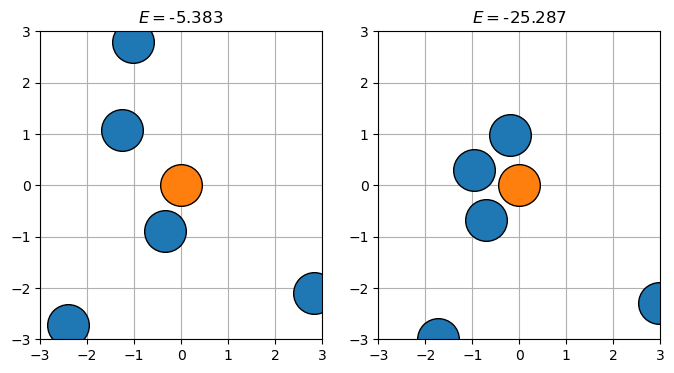

In [45]:
grid_size = [-3, 3]
fig, axs = plt.subplots(1,2,figsize=(8,4))
atom_col = create_atom_col(6, grid_size=grid_size)
atom_col.calculator = LennardJones()
#atom_col.unfreeze_atoms(indices=[0])
optimizer = Metropol(atom_col=atom_col, T=0.05, step_size=0.1)
optimized_col = optimizer.run(N_max=4000, E_limit=-100.0)
atom_cols = [atom_col, optimized_col]
sizes = [30.0 for i in range(6)]
for ax, atom_col in zip(axs, atom_cols):
    atom_col.set_sizes(sizes)
    ax.grid()
    ax.set_xlim(grid_size)
    ax.set_ylim(grid_size)
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")
    atom_col.plot(ax=ax)

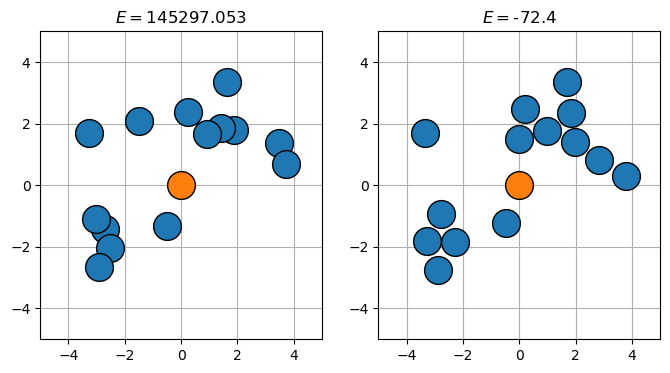

In [52]:
grid_size = [-4, 4]
fig, axs = plt.subplots(1,2,figsize=(8,4))
atom_col = create_atom_col(15, grid_size=grid_size)
atom_col.calculator = LennardJones()
#atom_col.unfreeze_atoms(indices=[0])
optimizer = Metropol(atom_col=atom_col, T=0.05, step_size=0.1)
optimized_col = optimizer.run(N_max=4000, E_limit=-500.0)
atom_cols = [atom_col, optimized_col]
sizes = [20.0 for i in range(15)]
for ax, atom_col in zip(axs, atom_cols):
    atom_col.set_sizes(sizes)
    ax.grid()
    ax.set_xlim([grid_size[0]-1, grid_size[1]+1])
    ax.set_ylim([grid_size[0]-1, grid_size[1]+1])
    ax.set_title(rf"$E=${atom_col.get_potential_energy().round(3)}")
    atom_col.plot(ax=ax)